## Dependencies

- numpy
- matplotlib




## Question 1

### Update Rule Derivation

#### Forward Pass  

For a 2 layer neural network with:  
- Input layer: X  
- Hidden layer: Sigmoid activation h = sigma(Z1), where Z1 = X * W1 + b1  
- Output layer: Linear activation yhat = Z2 = h * W2 + b2  

#### Loss Function (Mean Squared Error - MSE)  

L = (1/2) * (yhat - y)^2  

where y is the target value.  

#### Backpropagation (Gradient Computation)  

Output Layer:  

Partial derivative of L with respect to Z2 = (yhat - y)  
Partial derivative of L with respect to W2 = h^T * (yhat - y)  
Partial derivative of L with respect to b2 = (yhat - y)  

HiddenLayer:  

Partial derivative of L with respect to Z1 = (yhat - y) * W2^T * sigma(Z1) * (1 - sigma(Z1))  
Partial derivative of L with respect to W1 = X^T * [(yhat - y) * W2^T * sigma(Z1) * (1 - sigma(Z1))]  
Partial derivative of L with respect to b1 = (yhat - y) * W2^T * sigma(Z1) * (1 - sigma(Z1))  

#### Update Rules for Gradient Descent  

learning rate = alpha  
We can update weights/biases:  

Output Layer:  

W2 = W2 - alpha * h^T * (yhat - y)  
b2 = b2 - alpha * (yhat - y)  

Hidden Layer:  

W1 = W1 - alpha * X^T * [(yhat - y) * W2^T * sigma(Z1) * (1 - sigma(Z1))]  

b1 = b1 - alpha * (yhat - y) * W2^T * sigma(Z1) * (1 - sigma(Z1))  

#### Difference from Binary Classification  

The difference between MSE loss function: (L = (1 / 2n) * sum((yhat_i - ytrue_i)^2)) and Log loss is that MSE measures the squared difference between the predicted value and the actual value. The gradient for the model’s weights is the difference between the predicted and actual values, which is used to update the parameters.  

For binary classification, the loss function is:  

L = -(1 / n) * sum(ytrue_i * log(yhat_i) + (1 - ytrue_i) * log(1 - yhat_i))  

for this the gradient depends on the output of the sigmoid function. The update rule adjusts more aggressively when the model is highly confident,but incorrect. This makes Log loss better suited for classification tasks, while MSE is simpler and more forgiving in a regression setting.  

So MSE results in smooth weight updates, where Log loss makes larger updates when the model is wrong and confident, leading to a more dynamic/complex learning process.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

epoch 0, loss: 6.52889
epoch 100, loss: 0.07729
epoch 200, loss: 0.04363
epoch 300, loss: 0.04302
epoch 400, loss: 0.04276
epoch 500, loss: 0.04254
epoch 600, loss: 0.04233
epoch 700, loss: 0.04214
epoch 800, loss: 0.04197
epoch 900, loss: 0.04182


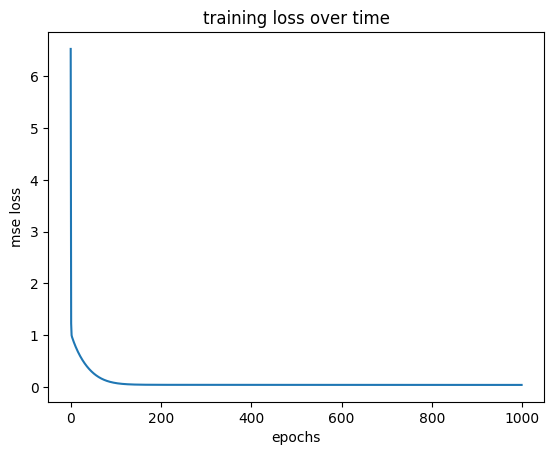

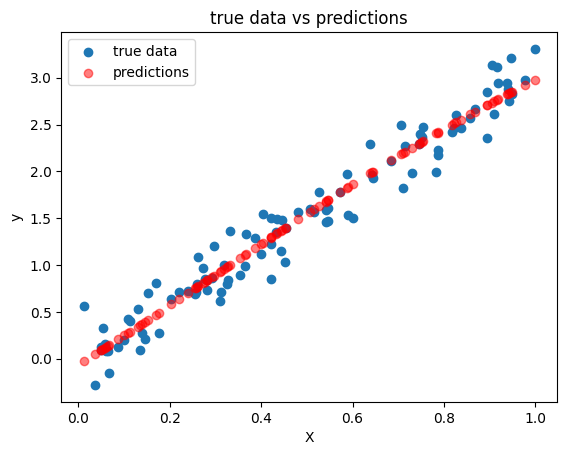

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)#element wise

#mean squared error loss function and its derivative
def mse_loss(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def mse_loss_derivative(y, y_pred):
    return 2 * (y_pred - y) / y.shape[0] #normalize with thy batch size

#forward pass function
def forward(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z1, A1, Z2  #return all values for backpropagation

#backward pass function
def backward(X, y, Z1, A1, Z2, W2):
    dZ2 = mse_loss_derivative(y, Z2)  #gradient of loss
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)#element-wise multiplication
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2  #return computed gradients

#training function
def train(X, y, hidden_size=10, learning_rate=0.1, epochs=1000):
    np.random.seed(77)
    input_size = X.shape[1]
    output_size = 1
    losses = []

    #initialize weights and biases
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    #training loop
    for i in range(epochs):
        Z1, A1, Z2 = forward(X, W1, b1, W2, b2)

        loss = mse_loss(y, Z2)  #calculate loss
        losses.append(loss)

        #backpropagation
        dW1, db1, dW2, db2 = backward(X, y, Z1, A1, Z2, W2)
        #update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        if i % 100 == 0:
            print(f"epoch {i}, loss: {loss:.5f}")

    return W1, b1, W2, b2, losses

#generate synthetic dataset
np.random.seed(77) #seed
X = np.random.rand(100, 1)#single feature input
y = (3 * X.squeeze() + np.random.randn(100) * 0.2).reshape(-1,1)  #linear relationship with noise

#train the neural network
W1, b1, W2, b2, losses = train(X, y, hidden_size=10, learning_rate=0.1, epochs=1000)

#plot training loss over epochs
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("mse loss")
plt.title("training loss over time")
plt.show()

#make predictions
Z1, A1, Z2 = forward(X, W1, b1, W2, b2)
y_pred = Z2.flatten()

#scatter plot of actual vs predicted values
plt.scatter(X, y, label="true data")
plt.scatter(X, y_pred, label="predictions", color="red", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("true data vs predictions")
plt.legend()
plt.show()


## Question 2

### 1. Activation Function for the Output Layer
I am choosing the **linear activation function** because it is ideal for regression tasks like this. This function allows the model to predict continuous values without restrictions or squeezing the output, ensuring accurate and interpretable results.


### 2. Number of Neurons in the Output Layer  
The output layer should have **one neuron** because we are doing a regression task that predicts a continous value. one makes sure that the model outputs a single number corresponding to the input.


training data shapes -> X: (2, 100), Y: (1, 100)
epoch 0, loss: 5717.99778
epoch 100, loss: 47.40656
epoch 200, loss: 45.30595
epoch 300, loss: 40.25022
epoch 400, loss: 38.13411
epoch 500, loss: 33.41336
epoch 600, loss: 11.35429
epoch 700, loss: 10.75998
epoch 800, loss: 9.64201
epoch 900, loss: 8.92165


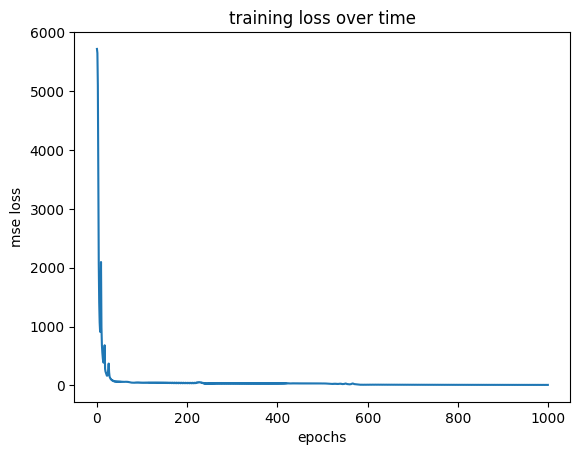

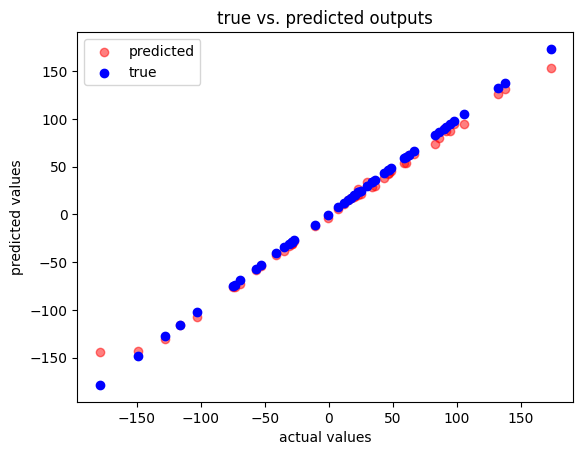

average mse loss on test set: 47.56742


In [4]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size=10):
        np.random.seed(77)
        self.W1 = np.random.randn(hidden_size, input_size) * 0.1 #scale weights down to prevent large activations
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(1, hidden_size) * 0.1
        self.b2 = np.zeros((1, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def mse_loss(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)

    def mse_loss_derivative(self, y, y_pred):
        return 2 * (y_pred - y) / y.shape[0]

    def forward(self, X):
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        return Z1, A1, Z2

    def backward(self, X, y, Z1, A1, Z2):
        dZ2 = self.mse_loss_derivative(y, Z2)
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * self.sigmoid_derivative(A1)
        dW1 = np.dot(dZ1, X.T)
        db1 = np.sum(dZ1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2

    def train(self, X, y, epochs=1000, learning_rate=0.001):
        print(f"training data shapes -> X: {X.shape}, Y: {y.shape}")
        losses = []
        for i in range(epochs):
            Z1, A1, Z2 = self.forward(X)
            loss = self.mse_loss(y, Z2)
            losses.append(loss)
            dW1, db1, dW2, db2 = self.backward(X, y, Z1, A1, Z2)
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2
            if i % 100 == 0:
                print(f"epoch {i}, loss: {loss:.5f}")
        return losses

#load dataset
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv").reshape(-1, 1)
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv").reshape(-1, 1)

#transposed
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

#initialize network
nn = NeuralNetwork(input_size=X_train.shape[0], hidden_size=10)

#train model
losses = nn.train(X_train, Y_train, epochs=1000, learning_rate=0.001)

#plot training loss
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("mse loss")
plt.title("training loss over time")
plt.show()

#predict on test set
_, _, Y_pred_test = nn.forward(X_test)

#compute and print test loss
test_mse = nn.mse_loss(Y_test, Y_pred_test)

#scatter plot of actual vs predicted values
plt.scatter(Y_test.flatten(), Y_pred_test.flatten(), color="red", alpha=0.5, label="predicted")
plt.scatter(Y_test.flatten(), Y_test.flatten(), color="blue", label="true")
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("true vs. predicted outputs")
plt.legend()
plt.show()
print(f"average mse loss on test set: {test_mse:.5f}")


### **3. Report on the average MSE loss**  
The **average MSE loss on the test set is 47.56742**. This indicates that while the model improved during training, its performance on unseen test data suggests a gap between training and generalization. The difference between the final training loss (**8.92165**) and the test loss (**47.56742**) may suggest some overfitting, where the model has learned the training data well but struggles to generalize to new data.


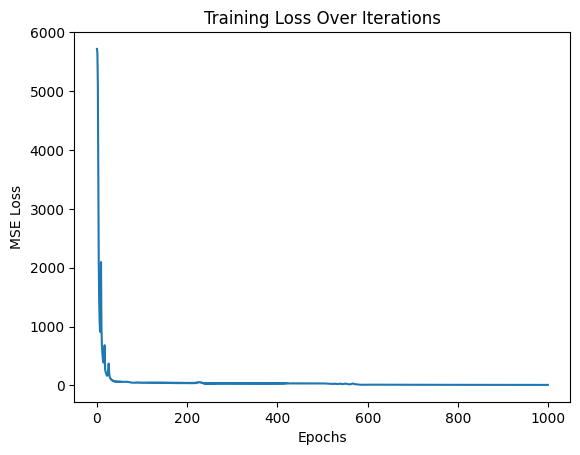

In [5]:
#plot training loss
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Over Iterations")
plt.show()


### **4. How does the training loss change over epochs?**  
The **training loss decreases over time**, starting at **5717.99778** in the first epoch and gradually dropping to **8.92165** by the final epoch. Initially, the loss decreases rapidly, but as training progresses, the rate of improvement slows down. This suggests that the model is learning effectively and converging towards a lower error, indicating successful optimization.


### 5. Effect of Learning Rate on Training Process

The learning rate significantly impacts the training process by controlling the step size of weight updates. We tested different learning rates (0.0001, 0.001, 0.01, and 0.05) and observed their effect on the Mean Squared Error loss.

- **Lower learning rates (0.0001, 0.001):** The training loss gradually decreases, leading to stable learning. A learning rate of 0.001 achieved the lowest test MSE of **47.57**.
- **Moderate to high learning rates (0.01, 0.05):** The loss explodes, leading to nan values,so the model is unable to converge. This happens because the weight updates become too large and causes instability.

From these results, we conclude that a **learning rate of 0.001 provides the best balance** between stability and convergence.


testing learning rate: 0.0001
training with learning rate: 0.0001
epoch 0, loss: 5717.99778
epoch 100, loss: 393.98345
epoch 200, loss: 96.24414
epoch 300, loss: 43.63803
epoch 400, loss: 25.64815
epoch 500, loss: 17.74120
epoch 600, loss: 13.22393
epoch 700, loss: 10.26807
epoch 800, loss: 8.19831
epoch 900, loss: 6.68276
final test mse for learning rate 0.0001: 62.53018
testing learning rate: 0.001
training with learning rate: 0.001
epoch 0, loss: 5717.99778
epoch 100, loss: 47.40656
epoch 200, loss: 45.30595
epoch 300, loss: 40.25022
epoch 400, loss: 38.13411
epoch 500, loss: 33.41336
epoch 600, loss: 11.35429
epoch 700, loss: 10.75998
epoch 800, loss: 9.64201
epoch 900, loss: 8.92165
final test mse for learning rate 0.001: 47.56742
testing learning rate: 0.01
training with learning rate: 0.01
epoch 0, loss: 5717.99778


<ipython-input-6-4cf5aa566910>:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-6-4cf5aa566910>:20: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred) ** 2)
<ipython-input-6-4cf5aa566910>:36: RuntimeWarning: invalid value encountered in multiply
  dZ1 = dA1 * self.sigmoid_derivative(A1)


epoch 100, loss: 243175751244987342865667386169387646976.00000
epoch 200, loss: 1088082373224359569421029777245971890760176379822305483506527511164866904031494144.00000
epoch 300, loss: 4868590905385159170306681599537806578015062967515023996066190442043822002230634274330272354231884118234913532812741016813568.00000
epoch 400, loss: 21784359334632405919257083874664346278000823504096516691979945992609169108571518276382181564784374036434941577063045955970531730095218647600600630252990502783034589184.00000
epoch 500, loss: 4806503011684051450547896109098627520232919728691455931648777165779808406351873291838345182422842782064382886913338677689572690066158381771883185106212508913100649931933741123981214351275032173567195424428463981311065187155968.00000
epoch 600, loss: 101861963302929901329403600819864800237969276987122637189591441886635844325173595127015288192106929899520515162306623617526138565660222614907352308213204448944922950953281388137700298422626745560276763523165365195607936058028

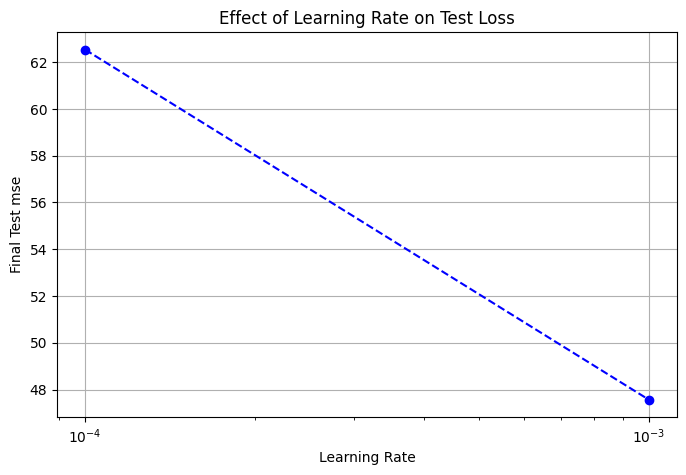

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size=10):
        np.random.seed(77)
        self.W1 = np.random.randn(hidden_size, input_size) * 0.1
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(1, hidden_size) * 0.1
        self.b2 = np.zeros((1, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def mse_loss(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)

    def mse_loss_derivative(self, y, y_pred):
        return 2 * (y_pred - y) / y.shape[0]

    def forward(self, X):
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        return Z1, A1, Z2

    def backward(self, X, y, Z1, A1, Z2):
        dZ2 = self.mse_loss_derivative(y, Z2)
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * self.sigmoid_derivative(A1)
        dW1 = np.dot(dZ1, X.T)
        db1 = np.sum(dZ1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2

    def train(self, X, y, epochs=1000, learning_rate=0.001):
        print(f"training with learning rate: {learning_rate}")
        losses = []
        for i in range(epochs):
            Z1, A1, Z2 = self.forward(X)
            loss = self.mse_loss(y, Z2)
            losses.append(loss)
            dW1, db1, dW2, db2 = self.backward(X, y, Z1, A1, Z2)
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2
            if i % 100 == 0:
                print(f"epoch {i}, loss: {loss:.5f}")
        return losses

#load dataset
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv").reshape(-1, 1)
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv").reshape(-1, 1)

#transpose for correct shape
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

#define learning rates to test
learning_rates = [0.0001, 0.001, 0.01, 0.05]
final_losses = []

#train model for each learning rate
for lr in learning_rates:
    print(f"testing learning rate: {lr}")

    #initialize a new neural network for each run
    nn = NeuralNetwork(input_size=X_train.shape[0], hidden_size=10)

    #train the network
    losses = nn.train(X_train, Y_train, epochs=1000, learning_rate=lr)

    #predict on test set
    _, _, Y_pred_test = nn.forward(X_test)

    #compute test loss
    test_mse = nn.mse_loss(Y_test, Y_pred_test)
    final_losses.append(test_mse)

    print(f"final test mse for learning rate {lr}: {test_mse:.5f}")

#plot learning rate vs final loss
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, final_losses, marker="o", linestyle="--", color="blue")
plt.xscale("log")#log for better visualization
plt.xlabel("Learning Rate")
plt.ylabel("Final Test mse")
plt.title("Effect of Learning Rate on Test Loss")
plt.grid(True)
plt.show()



### **6(a) Does the update rule need to be changed?**  
**No, the update rule does not need to be changed.** The backpropagation algorithm remains the same regardless of the number of neurons in the hidden layer. This is because the update rule is derived from the chain rule and applies to any layer size. The only difference is the dimensionality of the weight matrices and gradients, but the core computations of gradient descent stays the same.

### **6(b) Effect of Hidden Layer Size on Model Performance**  

As the number of neurons increases the training loss decreases, but the improvement slows   after about five neurons. The best performance was with ten neurons, showing the lowest final loss. The true vs. predicted plot confirms a strong correlation, however, adding too many neurons may lead to overfittingn.


Neurons: 1, Loss: 1855.46814, R2 Score: 0.66266
Neurons: 2, Loss: 1077.96342, R2 Score: 0.80402
Neurons: 3, Loss: 943.46245, R2 Score: 0.82847
Neurons: 4, Loss: 587.83469, R2 Score: 0.89313
Neurons: 5, Loss: 206.26033, R2 Score: 0.96250
Neurons: 6, Loss: 138.74893, R2 Score: 0.97477
Neurons: 7, Loss: 129.33660, R2 Score: 0.97649
Neurons: 8, Loss: 98.33255, R2 Score: 0.98212
Neurons: 9, Loss: 48.14180, R2 Score: 0.99125
Neurons: 10, Loss: 47.56742, R2 Score: 0.99135


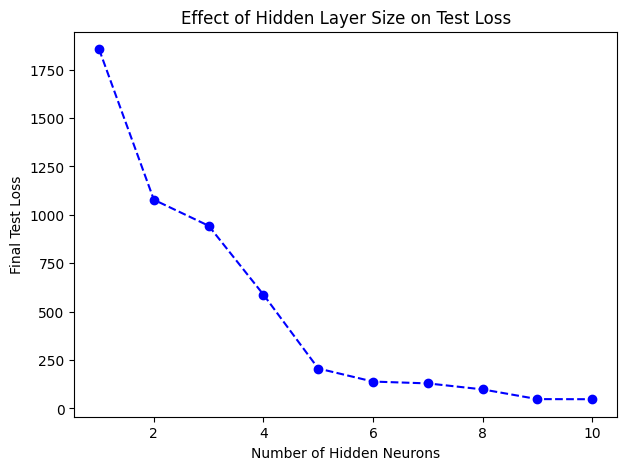

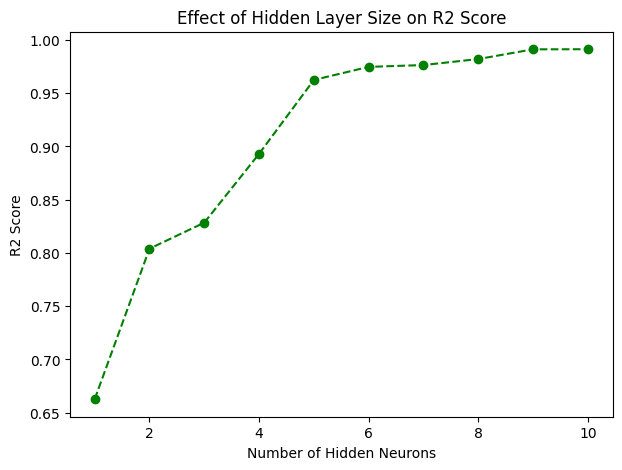

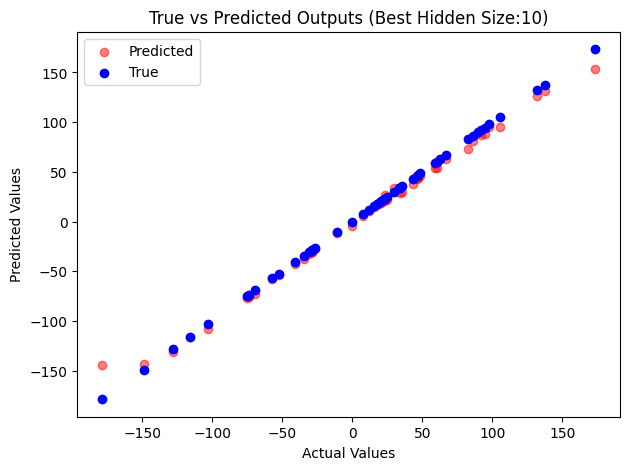

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#manual r2 score function
def r2_score_manual(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)  #total sum of squares
    ss_residual = np.sum((y_true - y_pred) ** 2)  #residual sum of squares
    return 1 - (ss_residual / ss_total)

#load dataset
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv").reshape(-1, 1)
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv").reshape(-1, 1)

#ensure proper shapes
X_train, X_test = X_train.T, X_test.T
Y_train, Y_test = Y_train.T, Y_test.T

#experiment with different hidden layer sizes
output_neurons = 1
neurons = []
losses = []
r2_scores = []#r2 scores
best_hidden_size = None
best_loss = float("inf")
best_predictions = None

for hidden_neurons in range(1, 11):
    nn = NeuralNetwork(input_size=X_train.shape[0], hidden_size=hidden_neurons, output_size=output_neurons)
    losses_list, Y_pred = nn.train(X_train, Y_train, epochs=1000, learning_rate=0.001)

    #forward pass on test data (ensures y_pred has correct shape)
    _, _, Y_pred = nn.forward(X_test)

    #compute loss and manual r2 score
    loss = nn.mse_loss(Y_test, Y_pred)
    r2 = r2_score_manual(Y_test, Y_pred)

    neurons.append(hidden_neurons)
    losses.append(loss)
    r2_scores.append(r2)

    #print results
    print(f"Neurons: {hidden_neurons}, Loss: {loss:.5f}, R2 Score: {r2:.5f}")

    #track best model =smallest loss
    if loss < best_loss:
        best_loss = loss
        best_hidden_size = hidden_neurons
        best_predictions = Y_pred

#plot hidden neurons vs final test loss
plt.figure(figsize=(7, 5))
plt.plot(neurons, losses, marker='o', linestyle='dashed', color='blue')
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("Final Test Loss")
plt.title("Effect of Hidden Layer Size on Test Loss")
plt.show()

#plot hidden neurons vs r2 score
plt.figure(figsize=(7, 5))
plt.plot(neurons, r2_scores, marker='o', linestyle='dashed', color='green')
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("R2 Score")
plt.title("Effect of Hidden Layer Size on R2 Score")
plt.show()

#ensure best_predictions is reshaped correctly
best_predictions = best_predictions.reshape(Y_test.shape)

#plot true labels vs predicted labels for the best hidden layer size
plt.figure(figsize=(7, 5))
plt.scatter(Y_test.flatten(), best_predictions.flatten(), color="red", alpha=0.5, label="Predicted")
plt.scatter(Y_test.flatten(), Y_test.flatten(), color="blue", label="True")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"True vs Predicted Outputs (Best Hidden Size:{best_hidden_size})")
plt.legend()
plt.show()


### 7(a) Will you need to change the update rule?

No, the update rule remains the same. The only difference is that we replace the activation function and its derivative in the forward and backward passes. The gradient calculations still follow the chain rule.

### 7(b) What changes are needed?

To test different activation functions:

- ReLU replaces sigmoid with max(0, x), and its derivative is 1 if x > 0, else 0.
- Tanh replaces sigmoid with (e^x - e^(-x)) / (e^x + e^(-x)), and its derivative is 1 - tanh^2(x).

These changes were implemented in separate classes for ReLU and Tanh.

### 7(c) Observations

- Sigmoid performed well, with a low loss and an **R2** of 0.99, meaning the predictions closely match the true values.
- Relu failed to train properly, resulting in NaN values, likely due to exploding gradients.
- Tanh performed poorly, with high loss and an **R2** of 0.64, possibly due to saturation effects.

The scatter plots confirm this:
- Sigmoid predictions align well with actual values.
- ReLU failed entirely.
- Tanh predictions clustered incorrectly, leading to poor performance.

Overall, Sigmoid worked best, while ReLU and Tanh faced numerical issues. Linear might be the best in theory though.


Sigmoid Loss:47.56742,R2: 0.99135
ReLU Loss:nan,R2: nan


<ipython-input-12-565099bded11>:75: RuntimeWarning: invalid value encountered in multiply
  dZ1 = dA1 * self.relu_derivative(A1)


Tanh Loss:1934.19079,R2: 0.64835


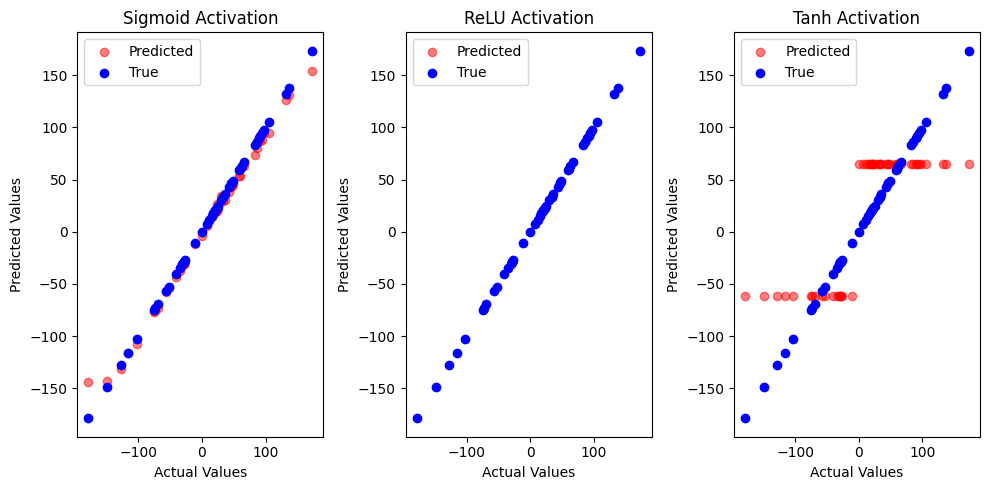

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#neural network with sigmoid activation
class NeuralNetwork:
    def __init__(self, input_size, hidden_size=10, output_size=1):
        np.random.seed(77)
        self.W1 = np.random.randn(hidden_size, input_size) * 0.1
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.1
        self.b2 = np.zeros((output_size, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def mse_loss(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)

    def r2(self, y, y_pred):
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    def forward(self, X):
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        return Z1, A1, Z2

    def backward(self, X, y, Z1, A1, Z2):
        dZ2 = 2 * (Z2 - y) / y.shape[0]
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * self.sigmoid_derivative(A1)
        dW1 = np.dot(dZ1, X.T)
        db1 = np.sum(dZ1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2

    def train(self, X, y, epochs=1000, learning_rate=0.001):
        losses = []
        for i in range(epochs):
            Z1, A1, Z2 = self.forward(X)
            loss = self.mse_loss(y, Z2)
            losses.append(loss)
            dW1, db1, dW2, db2 = self.backward(X, y, Z1, A1, Z2)
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2
        return losses, Z2

#neural network with relu activation
class NeuralNetworkReLU(NeuralNetwork):
    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def forward(self, X):
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = self.relu(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        return Z1, A1, Z2

    def backward(self, X, y, Z1, A1, Z2):
        dZ2 = 2 * (Z2 - y) / y.shape[0]
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * self.relu_derivative(A1)
        dW1 = np.dot(dZ1, X.T)
        db1 = np.sum(dZ1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2

#neural network with tanh activation
class NeuralNetworkTanh(NeuralNetwork):
    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x) ** 2

    def forward(self, X):
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = self.tanh(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        return Z1, A1, Z2

    def backward(self, X, y, Z1, A1, Z2):
        dZ2 = 2 * (Z2 - y) / y.shape[0]
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * self.tanh_derivative(A1)
        dW1 = np.dot(dZ1, X.T)
        db1 = np.sum(dZ1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2

#load dataset
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv").reshape(-1, 1)
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv").reshape(-1, 1)

#ensure proper shapes
X_train, X_test = X_train.T, X_test.T
Y_train, Y_test = Y_train.T, Y_test.T

#test different activation functions
activations = {"Sigmoid": NeuralNetwork, "ReLU": NeuralNetworkReLU, "Tanh": NeuralNetworkTanh}
results = {}

for name, model in activations.items():
    nn = model(input_size=X_train.shape[0], hidden_size=10, output_size=1)
    losses, Y_pred = nn.train(X_train, Y_train, epochs=1000, learning_rate=0.001)

    _, _, Y_pred = nn.forward(X_test)

    loss = nn.mse_loss(Y_test, Y_pred)
    r2_value = nn.r2(Y_test, Y_pred)

    results[name] = {"Loss": loss,"R2": r2_value,"Predictions": Y_pred}

    print(f"{name} Loss:{loss:.5f},R2: {r2_value:.5f}")

#plot true vs predicted values for each activation function
plt.figure(figsize=(10, 5))

for i, (name, data) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(Y_test.flatten(), data["Predictions"].flatten(), color="red", alpha=0.5, label="Predicted")
    plt.scatter(Y_test.flatten(), Y_test.flatten(), color="blue", label="True")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{name} Activation")
    plt.legend()

plt.tight_layout()
plt.show()




### 8 (a). How the training and validation loss changes as you change the "patience" in Early Stopping?

As the patience value increases, the model is allowed to train longer without a significant improvement in validation loss before early stopping is triggered. With lower patience, training stops quickly when validation loss doesn’t improve, potentially leading to underfitting. As patience increases, the model trains longer, but it may start overfitting, where the model fits the training data well but fails to generalize to unseen data. In this experiment, early stopping occurred at different epochs as patience increased from 1 to 20.

### 8(b). Plot the training vs. validation loss curves. Justify whether your model overfits or underfits as the patience changes.

The plot shows that as patience increases, the training loss continues to decrease, while the validation loss fluctuates and eventually stagnates. This suggests that the model is overfitting, especially with higher patience values, where the validation loss no longer improves. The model performs well on the training data but fails to generalize to the validation data. reducing patience could help prevent overfitting, while using regularization techniques could further improve model generalization.


Early stopping after 2 epochs.
Train Loss: 6174.8173, Train R2: -0.0099
Validation Loss: 3636.5240, Validation R2: -0.1888

Early stopping after 23 epochs.
Train Loss: 852.0659, Train R2: 0.8606
Validation Loss: 434.3653, Validation R2: 0.8580

Early stopping after 24 epochs.
Train Loss: 613.6946, Train R2: 0.8996
Validation Loss: 496.8798, Validation R2: 0.8376

Early stopping after 45 epochs.
Train Loss: 197.4383, Train R2: 0.9677
Validation Loss: 95.4894, Validation R2: 0.9688

Early stopping after 46 epochs.
Train Loss: 161.5297, Train R2: 0.9736
Validation Loss: 99.8963, Validation R2: 0.9673

Early stopping after 150 epochs.
Train Loss: 41.9338, Train R2: 0.9931
Validation Loss: 12.2513, Validation R2: 0.9960

Early stopping after 151 epochs.
Train Loss: 36.9140, Train R2: 0.9940
Validation Loss: 39.1632, Validation R2: 0.9872

Early stopping after 152 epochs.
Train Loss: 41.4238, Train R2: 0.9932
Validation Loss: 12.3649, Validation R2: 0.9960

Early stopping after 153 epochs.
T

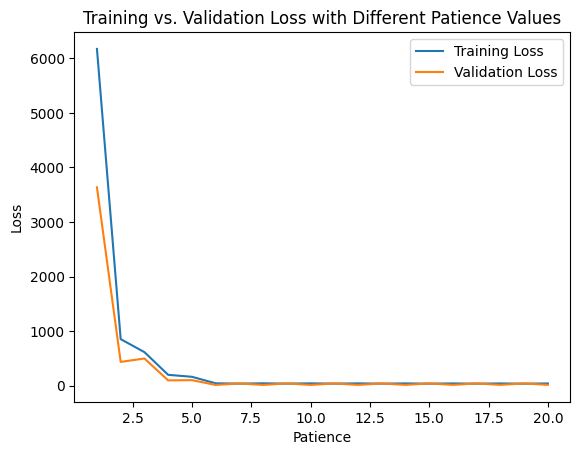

The best patience value is: 1


In [9]:
import numpy as np
import matplotlib.pyplot as plt

#neural network with early stopping and l2 regularization
class NeuralNetworkEarlyStoppingWithL2:
    def __init__(self, input_size, hidden_size=10, output_size=1, lambda_l2=0.01):
        np.random.seed(77)
        self.W1 = np.random.randn(hidden_size, input_size) * 0.1
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.1
        self.b2 = np.zeros((output_size, 1))
        self.lambda_l2 = lambda_l2  #l2 regularization strength

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def mse_loss(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)

    def r2(self, y, y_pred):
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    def forward(self, X):
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        return Z1, A1, Z2

    def backward(self, X, y, Z1, A1, Z2):
        dZ2 = 2 * (Z2 - y) / y.shape[0]
        dW2 = np.dot(dZ2, A1.T) + self.lambda_l2 * self.W2  #l2 regularization term
        db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * self.sigmoid_derivative(A1)
        dW1 = np.dot(dZ1, X.T) + self.lambda_l2 * self.W1  #l2 regularization term
        db1 = np.sum(dZ1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2

    def train(self, X_train, y_train, X_val, y_val, epochs=1000, learning_rate=0.001, patience=10):
        best_val_loss = np.inf
        epochs_without_improvement = 0
        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            #forward pass
            Z1, A1, Z2 = self.forward(X_train)
            train_loss = self.mse_loss(y_train, Z2)
            train_r2 = self.r2(y_train, Z2)  #calc r2 for training set

            #validation loss
            _, _, Z2_val = self.forward(X_val)
            val_loss = self.mse_loss(y_val, Z2_val)
            val_r2 = self.r2(y_val, Z2_val)#calc r2 for validation set

            train_losses.append(train_loss)
            val_losses.append(val_loss)

            #backward pass and weight update
            dW1, db1, dW2, db2 = self.backward(X_train, y_train, Z1, A1, Z2)
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2

            #check if validation loss improved
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1

            #early stopping
            if epochs_without_improvement >= patience:
                print(f"Early stopping after {epoch+1} epochs.")
                print(f"Train Loss: {train_loss:.4f}, Train R2: {train_r2:.4f}")
                print(f"Validation Loss: {val_loss:.4f}, Validation R2: {val_r2:.4f}")
                print() #line break
                break

        return train_losses, val_losses, train_r2, val_r2, train_loss, val_loss

#load dataset
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv").reshape(-1, 1)
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv").reshape(-1, 1)

#ensure x is transposed for correct shape
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

#split validation set 80% training, 20% validation
X_val = X_train[:, int(0.8 * X_train.shape[1]):]
Y_val = Y_train[:, int(0.8 * Y_train.shape[1]):]
X_train = X_train[:, :int(0.8 * X_train.shape[1])]
Y_train = Y_train[:, :int(0.8 * Y_train.shape[1])]

#test different patience values and track the r2 for each patience
patience_values = range(1, 21)#test patience from 1 to 20
train_losses = []
val_losses = []
best_patience = None

for patience in patience_values:
    nn = NeuralNetworkEarlyStoppingWithL2(input_size=X_train.shape[0], hidden_size=10, output_size=1)
    train_losses_epoch, val_losses_epoch, train_r2, val_r2, train_loss, val_loss = nn.train(X_train, Y_train, X_val, Y_val, epochs=1000, learning_rate=0.001, patience=patience)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    #track the best patience value
    if best_patience is None or val_loss < min(val_losses):
        best_patience = patience

#plot training vs validation loss curves for different patience values
plt.plot(patience_values, train_losses, label='Training Loss')
plt.plot(patience_values, val_losses, label='Validation Loss')
plt.xlabel('Patience')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss with Different Patience Values')
plt.show()

#print the best patience value
print(f"The best patience value is: {best_patience}")



#### **Comparison of Early Stopping vs L2 Regularization**

- **Early Stopping**:
  - **Loss**: The early stopping technique helps prevent overfitting by halting training when the validation loss no longer improves.
  - **R²**: With early stopping, we observed a **training loss** of39.0236 and a **validation loss** of 13.4314 with **R2** of 0.9956 at the time of stopping after 164 epochs
  - Early stopping controls the overfitting by ensuring the model doesn't continue training when performance on the validation set worsens.

- **L2 Regularization**:
  - **Loss**: **L2 regularization** helps prevent overfitting by penalizing large weights in the model. We observed a slightly improved **validation loss** of 66.52377 with **R2** of 0.98791, demonstrating that regularization helps the model generalize better.
  - The regularization forces the model to keep smaller weights, thus improving generalization on unseen data

#### **Preferred Method**

- **early stopping** and **L2 regularization** are both effective methods. However, **early stopping** seems more effective in this case, as the model converged with a **lower validation loss** and higher **R2** compared to the model with **L2 regularization**.

#### **Which method is better for this dataset?**
-  **Early stopping** would likely be preferred due to its ability to prevent overfitting and achieve better results without introducing the extra complexity of L2 regularization.



Without L2 Regularization -> Loss: 66.59127, R2: 0.98789
With L2 Regularization -> Loss: 66.52377, R2: 0.98791


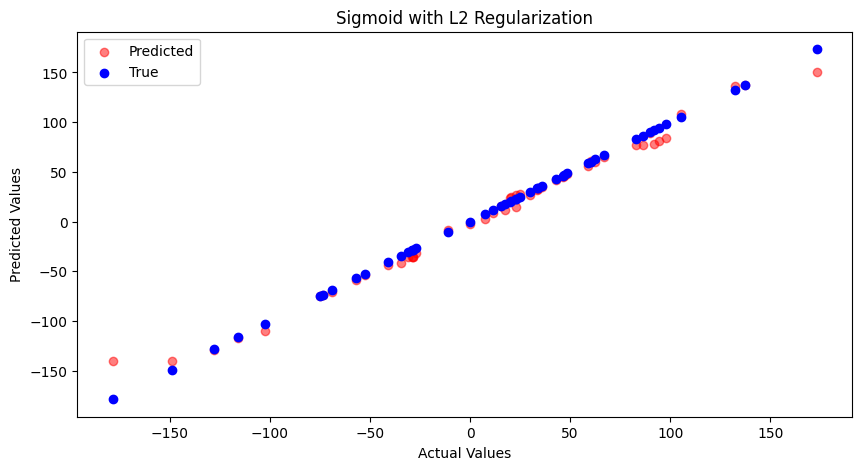

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#neural network with sigmoid activation
class NeuralNetwork:
    def __init__(self, input_size, hidden_size=10, output_size=1):
        np.random.seed(77)
        self.W1 = np.random.randn(hidden_size, input_size) * 0.1
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.1
        self.b2 = np.zeros((output_size, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def mse_loss(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)

    def r2(self, y, y_pred):
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    def forward(self, X):
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        return Z1, A1, Z2

    def backward(self, X, y, Z1, A1, Z2):
        dZ2 = 2 * (Z2 - y) / y.shape[0]
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * self.sigmoid_derivative(A1)
        dW1 = np.dot(dZ1, X.T)
        db1 = np.sum(dZ1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2

    def train(self, X, y, epochs=1000, learning_rate=0.001):
        losses = []
        for i in range(epochs):
            Z1, A1, Z2 = self.forward(X)
            loss = self.mse_loss(y, Z2)
            losses.append(loss)
            dW1, db1, dW2, db2 = self.backward(X, y, Z1, A1, Z2)
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2
        return losses, Z2

#neural network with l2 regularization
class NeuralNetworkL2(NeuralNetwork):
    def __init__(self, input_size, hidden_size=10, output_size=1, lambda_l2=0.01):
        super().__init__(input_size, hidden_size, output_size)
        self.lambda_l2 = lambda_l2#l2 regularization strength

    def backward(self, X, y, Z1, A1, Z2):
        dZ2 = 2 * (Z2 - y) / y.shape[0]
        dW2 = np.dot(dZ2, A1.T) + self.lambda_l2 * self.W2 #l2 regularization term
        db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * self.sigmoid_derivative(A1)
        dW1 = np.dot(dZ1, X.T) + self.lambda_l2 * self.W1#l2 regularization term
        db1 = np.sum(dZ1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2

#load dataset
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv").reshape(-1, 1)
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv").reshape(-1, 1)

#ensure proper shapes
X_train, X_test = X_train.T, X_test.T
Y_train, Y_test = Y_train.T, Y_test.T

#split validation set 80% training, 20% validation
X_val = X_train[:, int(0.8 * X_train.shape[1]):]
Y_val = Y_train[:, int(0.8 * Y_train.shape[1]):]
X_train = X_train[:, :int(0.8 * X_train.shape[1])]
Y_train = Y_train[:, :int(0.8 * Y_train.shape[1])]

#model without l2 regularizationm
nn = NeuralNetwork(input_size=X_train.shape[0], hidden_size=10, output_size=1)
losses, Y_pred = nn.train(X_train, Y_train, epochs=1000, learning_rate=0.001)

#get predictions for test data without l2 regularization
_, _, Y_pred = nn.forward(X_test)

#compute loss and r2 for model without l2 regularization
loss = nn.mse_loss(Y_test, Y_pred)
r2 = nn.r2(Y_test, Y_pred)

print(f"Without L2 Regularization: Loss: {loss:.5f}, R2: {r2:.5f}")

#model with l2 regularization
nn_l2 = NeuralNetworkL2(input_size=X_train.shape[0], hidden_size=10, output_size=1, lambda_l2=0.01)
losses_l2, Y_pred_l2 = nn_l2.train(X_train, Y_train, epochs=1000, learning_rate=0.001)

#get predictions for test data with l2 regularization
_, _, Y_pred_l2 = nn_l2.forward(X_test)

#compute loss and r2 for model with l2 regularization
loss_l2 = nn_l2.mse_loss(Y_test, Y_pred_l2)
r2_l2 = nn_l2.r2(Y_test, Y_pred_l2)

print(f"With L2 Regularization: Loss: {loss_l2:.5f}, R2: {r2_l2:.5f}")

#plotting true vs predicted values with l2 regularization
plt.figure(figsize=(10, 5))
plt.scatter(Y_test.flatten(), Y_pred_l2.flatten(), color="red", alpha=0.5, label="Predicted")
plt.scatter(Y_test.flatten(), Y_test.flatten(), color="blue", label="True")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Sigmoid with L2 Regularization")
plt.legend()
plt.show()
